In [1]:
import pandas as pd


In [2]:
# The data is created with the script parliament/Sentiment_Analysis/sentiments.py
data = pd.read_feather('../data/ParlaMint-GB-commons-with-sentiment.feather')

<AxesSubplot: title={'center': 'Sentiment score'}, ylabel='Frequency'>

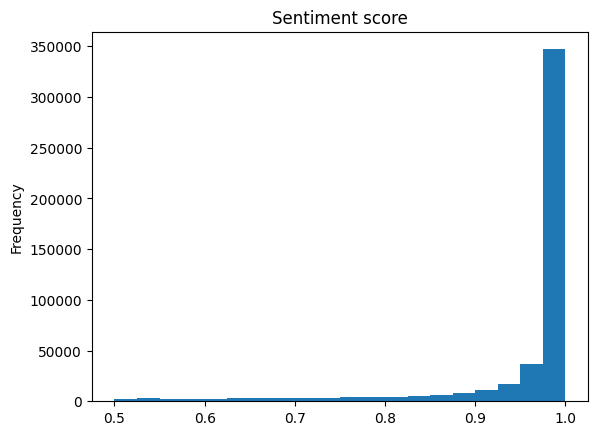

In [4]:
# Plot the sentiment score histogram
data['score'].plot.hist(bins=20, title='Sentiment score')

In [16]:
# Normalize the score to a range of 0 to 1 from 0.5 to 1
data['score'] = (data['score'] - 0.5) * 2

# Set the score to negative if the label is negative
data.loc[data['label'] == 'NEGATIVE', 'score'] = -data['score']

In [18]:
# Change the 'Date' column to a datetime
data['Date'] = pd.to_datetime(data['Date'])

In [45]:
# Create a new column with the absolute value of score
data['abs_score'] = data['score'].abs()

# Create a new column with the rolling mean per month of the absolute score
data['rolling_mean'] = data['abs_score'].rolling(60000).mean()




<AxesSubplot: title={'center': 'Rolling mean of the absolute score'}, xlabel='Date'>

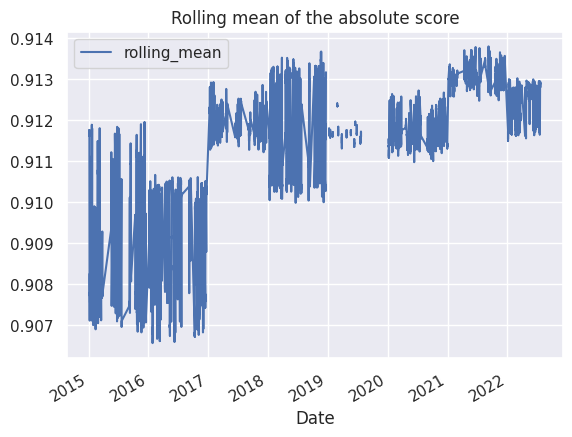

In [46]:
# Plot the rolling mean of the absolute score
data.plot(x='Date', y='rolling_mean', title='Rolling mean of the absolute score')

<AxesSubplot: title={'center': 'Absolute score averaged by month'}, xlabel='Date'>

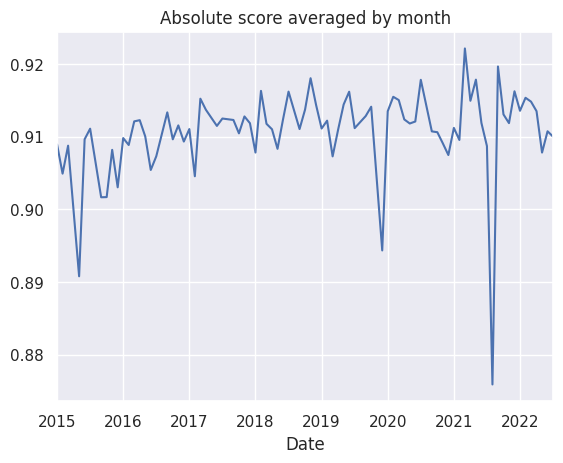

In [31]:
# Plot the absolute score averaged by month
data.groupby(data['Date'].dt.to_period('M'))['abs_score'].mean().plot(title='Absolute score averaged by month')